- https://gym.openai.com/
- https://openai.com/blog/universe/

- Pytorch参考, https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
- https://github.com/Finspire13/pytorch-policy-gradient-example/blob/master/pg.py
- 一个博客, https://karpathy.github.io/2016/05/31/rl/

## 关于Gym的使用

In [0]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [2]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (46.1.3)


In [0]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [4]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

## Gym简单测试

In [0]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

In [6]:
print(env.action_space)

Discrete(2)


In [18]:
[env.action_space.sample() for i in range(10)]

[0, 0, 1, 1, 0, 1, 0, 1, 1, 1]

In [7]:
print(env.observation_space)

Box(4,)


In [19]:
print(env.observation_space.high)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [20]:
print(env.observation_space.low)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [23]:
[env.observation_space.bounded_above, env.observation_space.bounded_below]

[array([ True,  True,  True,  True]), array([ True,  True,  True,  True])]

## 使用Video的方式可视化

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [25]:
env = wrap_env(gym.make("CartPole-v0"))

observation = env.reset()

while True:  
    env.render()
    
    #your agent goes here
    action = env.action_space.sample() 
    observation, reward, done, info = env.step(action) 
        
    if done: 
      break;
            
env.close()
show_video()

## 可视化过程

<Figure size 432x288 with 0 Axes>

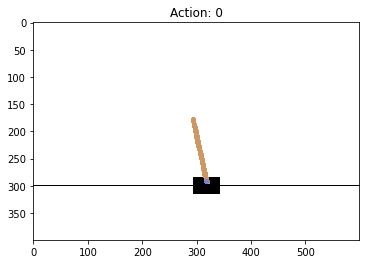

19


In [27]:
env = gym.make('CartPole-v0') # 初始化场景

env.reset() # 初始状态
env.render(mode='rgb_array')
t = 0
# 随便动一步(初始状态)
action = env.action_space.sample() 
state, _, done, _ = env.step(action)
env.render(mode='rgb_array')


# 绘图
plt.figure()
plt.clf()
plt.title('Example extracted screen')

while True:
    action = env.action_space.sample() 
    # 往后走一步
    state, _, done, _ = env.step(action)
    # 生成走后的场景
    current_screen = env.render(mode='rgb_array') # 返回现在的图像, 用于可视化
    # 绘制画面
    plt.pause(0.7)  # pause a bit so that plots are updated
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    plt.title('Action: {}'.format(action))
    plt.imshow(current_screen, interpolation='none')

    t = t + 1

    if done:
        break
    
    if t>100:
        break

plt.show()

env.close()
print(t)